In [1]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

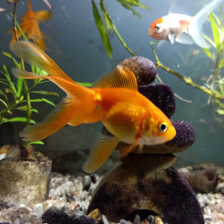

In [5]:
gold_fish = Image.open("/content/sample_data/Katri.jpg").resize(IMAGE_SHAPE)
gold_fish

In [9]:
gold_fish = np.array(gold_fish) / 255.0
gold_fish.shape

(224, 224, 3)

In [12]:
gold_fish[np.newaxis, ...].shape

(1, 224, 224, 3)

In [13]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result

array([[ 0.2441636 ,  2.5483825 ,  9.879251  , ..., -1.353992  ,
        -0.13162634, -0.28572816]], dtype=float32)

In [15]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [16]:
image_labels = []
with open("/content/sample_data/ImageNetLabels.txt", "r") as f:
  image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [17]:
image_labels[predicted_label_index]

'goldfish'

### Loading flowers dataset

In [19]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='/content/sample_data', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228827136/228813984 [==============================] - 1s 0us/step


In [20]:
data_dir

'/content/sample_data/datasets/flower_photos'

In [21]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/content/sample_data/datasets/flower_photos')

In [22]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('/content/sample_data/datasets/flower_photos/daisy/7320089276_87b544e341.jpg'),
 PosixPath('/content/sample_data/datasets/flower_photos/daisy/3310644753_5607eb96a4_m.jpg'),
 PosixPath('/content/sample_data/datasets/flower_photos/daisy/5796562389_ae43c83317_m.jpg'),
 PosixPath('/content/sample_data/datasets/flower_photos/daisy/7630520686_e3a61ac763.jpg'),
 PosixPath('/content/sample_data/datasets/flower_photos/daisy/175106495_53ebdef092_n.jpg')]

In [23]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [24]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('/content/sample_data/datasets/flower_photos/roses/15712574834_2f121c7cf9_m.jpg'),
 PosixPath('/content/sample_data/datasets/flower_photos/roses/3500121696_5b6a69effb_n.jpg'),
 PosixPath('/content/sample_data/datasets/flower_photos/roses/2059172936_032ffc12aa.jpg'),
 PosixPath('/content/sample_data/datasets/flower_photos/roses/4061451210_1650590c6a.jpg'),
 PosixPath('/content/sample_data/datasets/flower_photos/roses/2093263381_afd51358a3.jpg')]

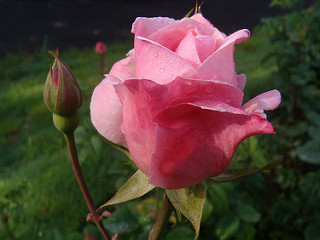

In [26]:
Image.open(str(roses[1]))

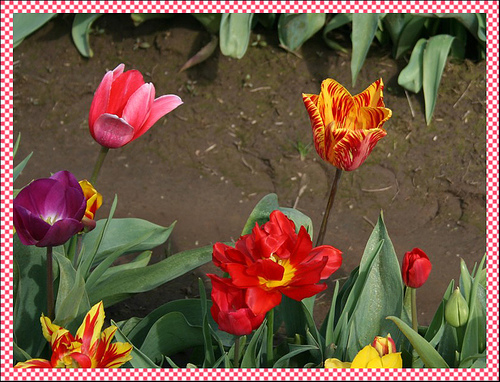

In [27]:
tulips = list(data_dir.glob('tulips/*'))
Image.open(str(tulips[0]))

In [28]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [29]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [30]:
flowers_images_dict['roses'][:5]

[PosixPath('/content/sample_data/datasets/flower_photos/roses/15712574834_2f121c7cf9_m.jpg'),
 PosixPath('/content/sample_data/datasets/flower_photos/roses/3500121696_5b6a69effb_n.jpg'),
 PosixPath('/content/sample_data/datasets/flower_photos/roses/2059172936_032ffc12aa.jpg'),
 PosixPath('/content/sample_data/datasets/flower_photos/roses/4061451210_1650590c6a.jpg'),
 PosixPath('/content/sample_data/datasets/flower_photos/roses/2093263381_afd51358a3.jpg')]

In [32]:
str(flowers_images_dict['roses'][0])

'/content/sample_data/datasets/flower_photos/roses/15712574834_2f121c7cf9_m.jpg'

In [33]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [34]:
img.shape

(240, 164, 3)

In [35]:
cv2.resize(img, IMAGE_SHAPE).shape

(224, 224, 3)

In [38]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img, IMAGE_SHAPE)
    X.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

In [39]:
X = np.array(X)
y = np.array(y)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [41]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

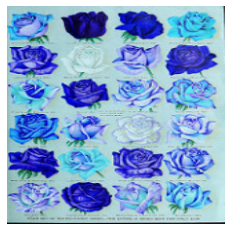

In [52]:
plt.axis("off")
plt.imshow(X[0])

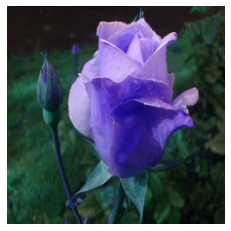

In [53]:
plt.axis("off")
plt.imshow(X[1])

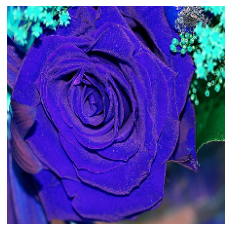

In [54]:
plt.axis("off")
plt.imshow(X[2])

In [57]:
predicted = classifier.predict(np.array([X[0], X[1], X[2]]))
predicted = np.argmax(predicted, axis=1)
predicted

array([795, 795, 722])

In [58]:
image_labels[predicted[0]]

'shower curtain'

In [59]:
image_labels[predicted[1]]

'shower curtain'

In [60]:
image_labels[predicted[2]]

'pillow'

### Retraining using our dataset

In [61]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [62]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [64]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 73s 795ms/step - loss: 0.8050 - acc: 0.7057
Epoch 2/5
86/86 [==============================] - 67s 785ms/step - loss: 0.4050 - acc: 0.8616
Epoch 3/5
86/86 [==============================] - 68s 795ms/step - loss: 0.3280 - acc: 0.8870
Epoch 4/5
86/86 [==============================] - 67s 784ms/step - loss: 0.2672 - acc: 0.9106
Epoch 5/5
86/86 [==============================] - 67s 784ms/step - loss: 0.2317 - acc: 0.9302


In [65]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 23s 778ms/step - loss: 0.3840 - acc: 0.8617


[0.3840000033378601, 0.8616557717323303]